In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv", low_memory=False)

# 1. Which of our sellers are consistently shipping on time?

Top 10 Sellers and Their On-Time Delivery Percentages:
                           seller_id  on_time_percentage
0  0015a82c2db000af6aaaf3ae2ecb0532               100.0
1  001cca7ae9ae17fb1caed9dfb1094831               100.0
2  001e6ad469a905060d959994f1b41e4f               100.0
3  002100f778ceb8431b7a1020ff7ab48f               100.0
4  003554e2dce176b5555353e4f3555ac8               100.0
5  004c9cd9d87a3c30c522c48c4fc07416               100.0
6  00720abe85ba0859807595bbf045a33b               100.0
7  00ab3eff1b5192e5f1a63bcecfee11c8               100.0
8  00d8b143d12632bad99c0ad66ad52825               100.0
9  00ee68308b45bc5e2660cd833c3f81cc               100.0


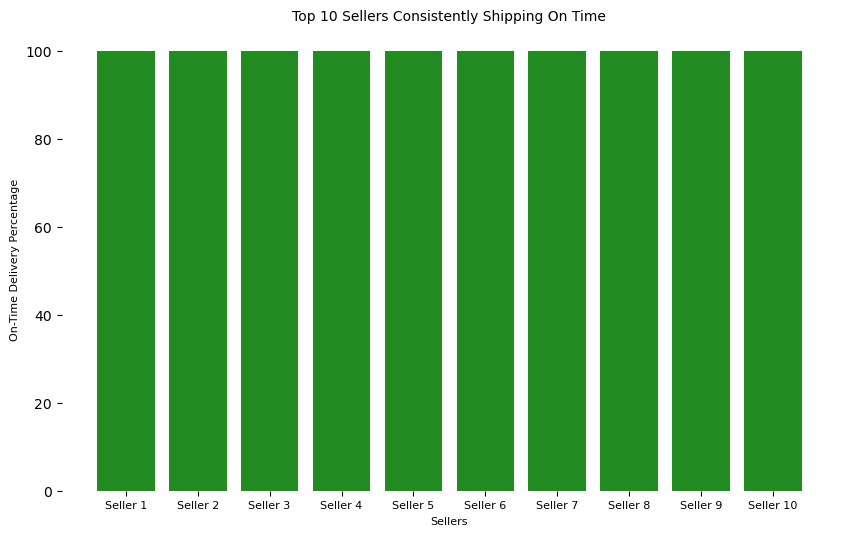

In [7]:
# Calculate on-time deliveries for each seller
df['on_time'] = df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']

# Calculate the percentage of on-time deliveries for each seller
on_time_stats = df.groupby('seller_id')['on_time'].agg(['sum', 'count'])
on_time_stats['on_time_percentage'] = (on_time_stats['sum'] / on_time_stats['count']) * 100

# Reset the index for better readability
on_time_stats.reset_index(inplace=True)

# Get the top 10 sellers based on on-time delivery percentage
top_10_on_time_sellers = on_time_stats.nlargest(10, 'on_time_percentage')

# Display the top 10 sellers with their on-time delivery percentages
print("Top 10 Sellers and Their On-Time Delivery Percentages:\n", top_10_on_time_sellers[['seller_id', 'on_time_percentage']])

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart for top 10 on-time delivery percentages
ax.bar(range(len(top_10_on_time_sellers)), top_10_on_time_sellers['on_time_percentage'], color='forestgreen')

# Add labels and title
ax.set_title('Top 10 Sellers Consistently Shipping On Time', fontsize=10)
ax.set_xlabel('Sellers', fontsize=8)  # Changed label to a more professional term
ax.set_ylabel('On-Time Delivery Percentage', fontsize=8)

# Set custom x-tick labels if seller names are available
ax.set_xticks(range(len(top_10_on_time_sellers)))
ax.set_xticklabels(['Seller ' + str(i + 1) for i in range(len(top_10_on_time_sellers))], rotation=0, fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('top_10_sellers_on_time_delivery_percentage.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


# 2. How does our freight cost vary across different regions and product categories?

In [11]:
# Calculate average freight costs by region and product category
average_freight = df.groupby(['customer_state', 'product_category_name'])['freight_value'].mean().reset_index()

# Display the average freight costs
print("Average Freight Costs by Region and Product Category:\n", average_freight)

# Create a pivot table for better visualization
freight_pivot = average_freight.pivot(index='customer_state', columns='product_category_name', values='freight_value')

Average Freight Costs by Region and Product Category:
      customer_state        product_category_name  freight_value
0                AC                      Unknown      30.220000
1                AC             artigos_de_natal      60.950000
2                AC                   automotivo      29.284000
3                AC                        bebes      58.043333
4                AC                 beleza_saude      38.345714
...             ...                          ...            ...
1413             TO  portateis_casa_forno_e_cafe      95.440000
1414             TO           relogios_presentes      31.667333
1415             TO                    telefonia      29.873333
1416             TO               telefonia_fixa      26.790000
1417             TO        utilidades_domesticas      36.728125

[1418 rows x 3 columns]


Average Freight Costs by Region and Product Category:
      customer_state        product_category_name  freight_value
0                AC                      Unknown      30.220000
1                AC             artigos_de_natal      60.950000
2                AC                   automotivo      29.284000
3                AC                        bebes      58.043333
4                AC                 beleza_saude      38.345714
...             ...                          ...            ...
1413             TO  portateis_casa_forno_e_cafe      95.440000
1414             TO           relogios_presentes      31.667333
1415             TO                    telefonia      29.873333
1416             TO               telefonia_fixa      26.790000
1417             TO        utilidades_domesticas      36.728125

[1418 rows x 3 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_16488\751166973.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_freight['customer_state'].unique(), rotation=45, ha='right', fontsize=8)


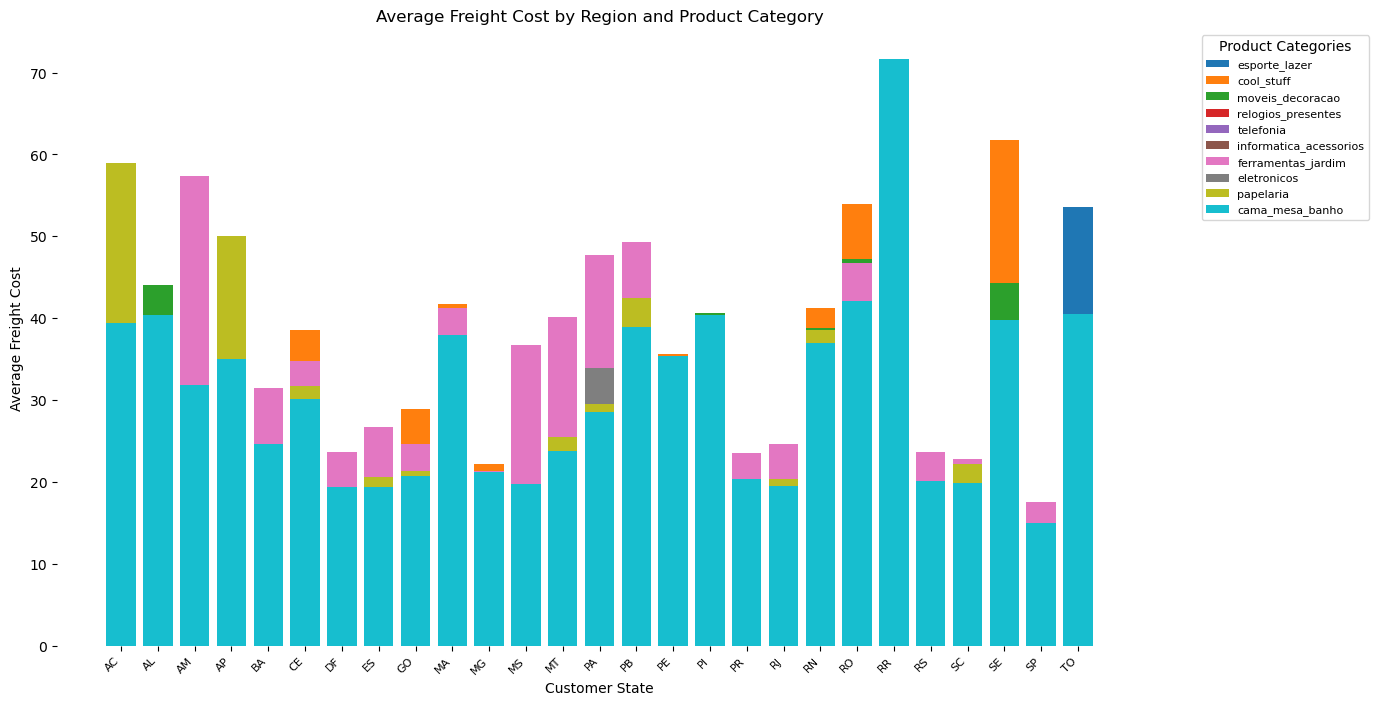

In [12]:
# Calculate average freight costs by region and product category
average_freight = df.groupby(['customer_state', 'product_category_name'])['freight_value'].mean().reset_index()

# Display the average freight costs
print("Average Freight Costs by Region and Product Category:\n", average_freight)

# Get the top product categories for better visualization (optional)
top_categories = average_freight['product_category_name'].value_counts().nlargest(10).index
filtered_freight = average_freight[average_freight['product_category_name'].isin(top_categories)]

# Plotting the results
fig, ax = plt.subplots(figsize=(14, 8))  # Increased size for better readability

# Create a bar plot for average freight costs
for category in top_categories:
    category_data = filtered_freight[filtered_freight['product_category_name'] == category]
    ax.bar(category_data['customer_state'], category_data['freight_value'], label=category)

# Add labels and title
ax.set_title('Average Freight Cost by Region and Product Category', fontsize=12)
ax.set_xlabel('Customer State', fontsize=10)
ax.set_ylabel('Average Freight Cost', fontsize=10)

# Rotate x-axis labels for better readability
ax.set_xticklabels(filtered_freight['customer_state'].unique(), rotation=45, ha='right', fontsize=8)

# Add legend
ax.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Professional formatting: Remove spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('average_freight_cost_by_region_and_product_category.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
